<span style="font-family:Avenir;">
<font color="yellow"> <h1> Language </font> Success </h1> 
</span>

<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Stating Questions </h2> </font>
</span>



<span style="font-family:Avenir; font-size:1.4em;">
✦ <font color="Cyan"> What </font>
 is the 
 <font color="Pink"> distribution </font> of the  
<font color="Cyan"> total number</font>  of
<font color="Pink"> stars </font> over different
<font color="Pink">programming languages</font>?

✦ <font color="Grey"> What is the 
distribution of the
average numbe of 
stars over time for the top 7 languages?</font>
</span>

✦ <font color="Cyan"> What </font> is the 
<font color="Pink">distribution </font> of the
<font color="Cyan"> number</font> of the
<font color="Pink"> normalized stars overtime</font> for the <font color="Cyan">top 7 languages</font>?
</span>



<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Question is specific, interesting and novel.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Clearly the question is specific as it is all about a simple data quries. The question is interesting as it is directly related to the popularity of programming languages.
      The question is already answered in the line chart form in this site <a href="https://madnight.github.io/githut/#/stars/2023/1">A SMALL PLACE TO DISCOVER LANGUAGES IN GITHUB</a>
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Change it to a novel one that is not giving a number of star but the number of stars normalized by the number of repositories.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Exploratory Data Analytics</h2> </font>
</span>

### Import Libraries

In [1]:
import sys; sys.path.append('../../')
from DataPreparation.Preprocess import read_data 
from DataPreparation.Visualize import convey_insights
from Logic import outliers_pie_plot, stars_per_languages, replace_missing_with_document, yearly_stars_distribution_per_language, remove_2023, remove_outliers, remove_documents
import warnings
warnings.filterwarnings('ignore')

In [2]:
# TODO: Remove
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = dpi = 300

### Read Date

In [3]:
x_data_d, _ = read_data(kind="all", fix=True)

In [4]:
# Add primaryLanguage missing meaning
x_data_d = replace_missing_with_document(x_data_d)
x_data_d = remove_documents(x_data_d)

In [5]:
# Remove year 2023 -> not a complete year
x_data_d = remove_2023(x_data_d)

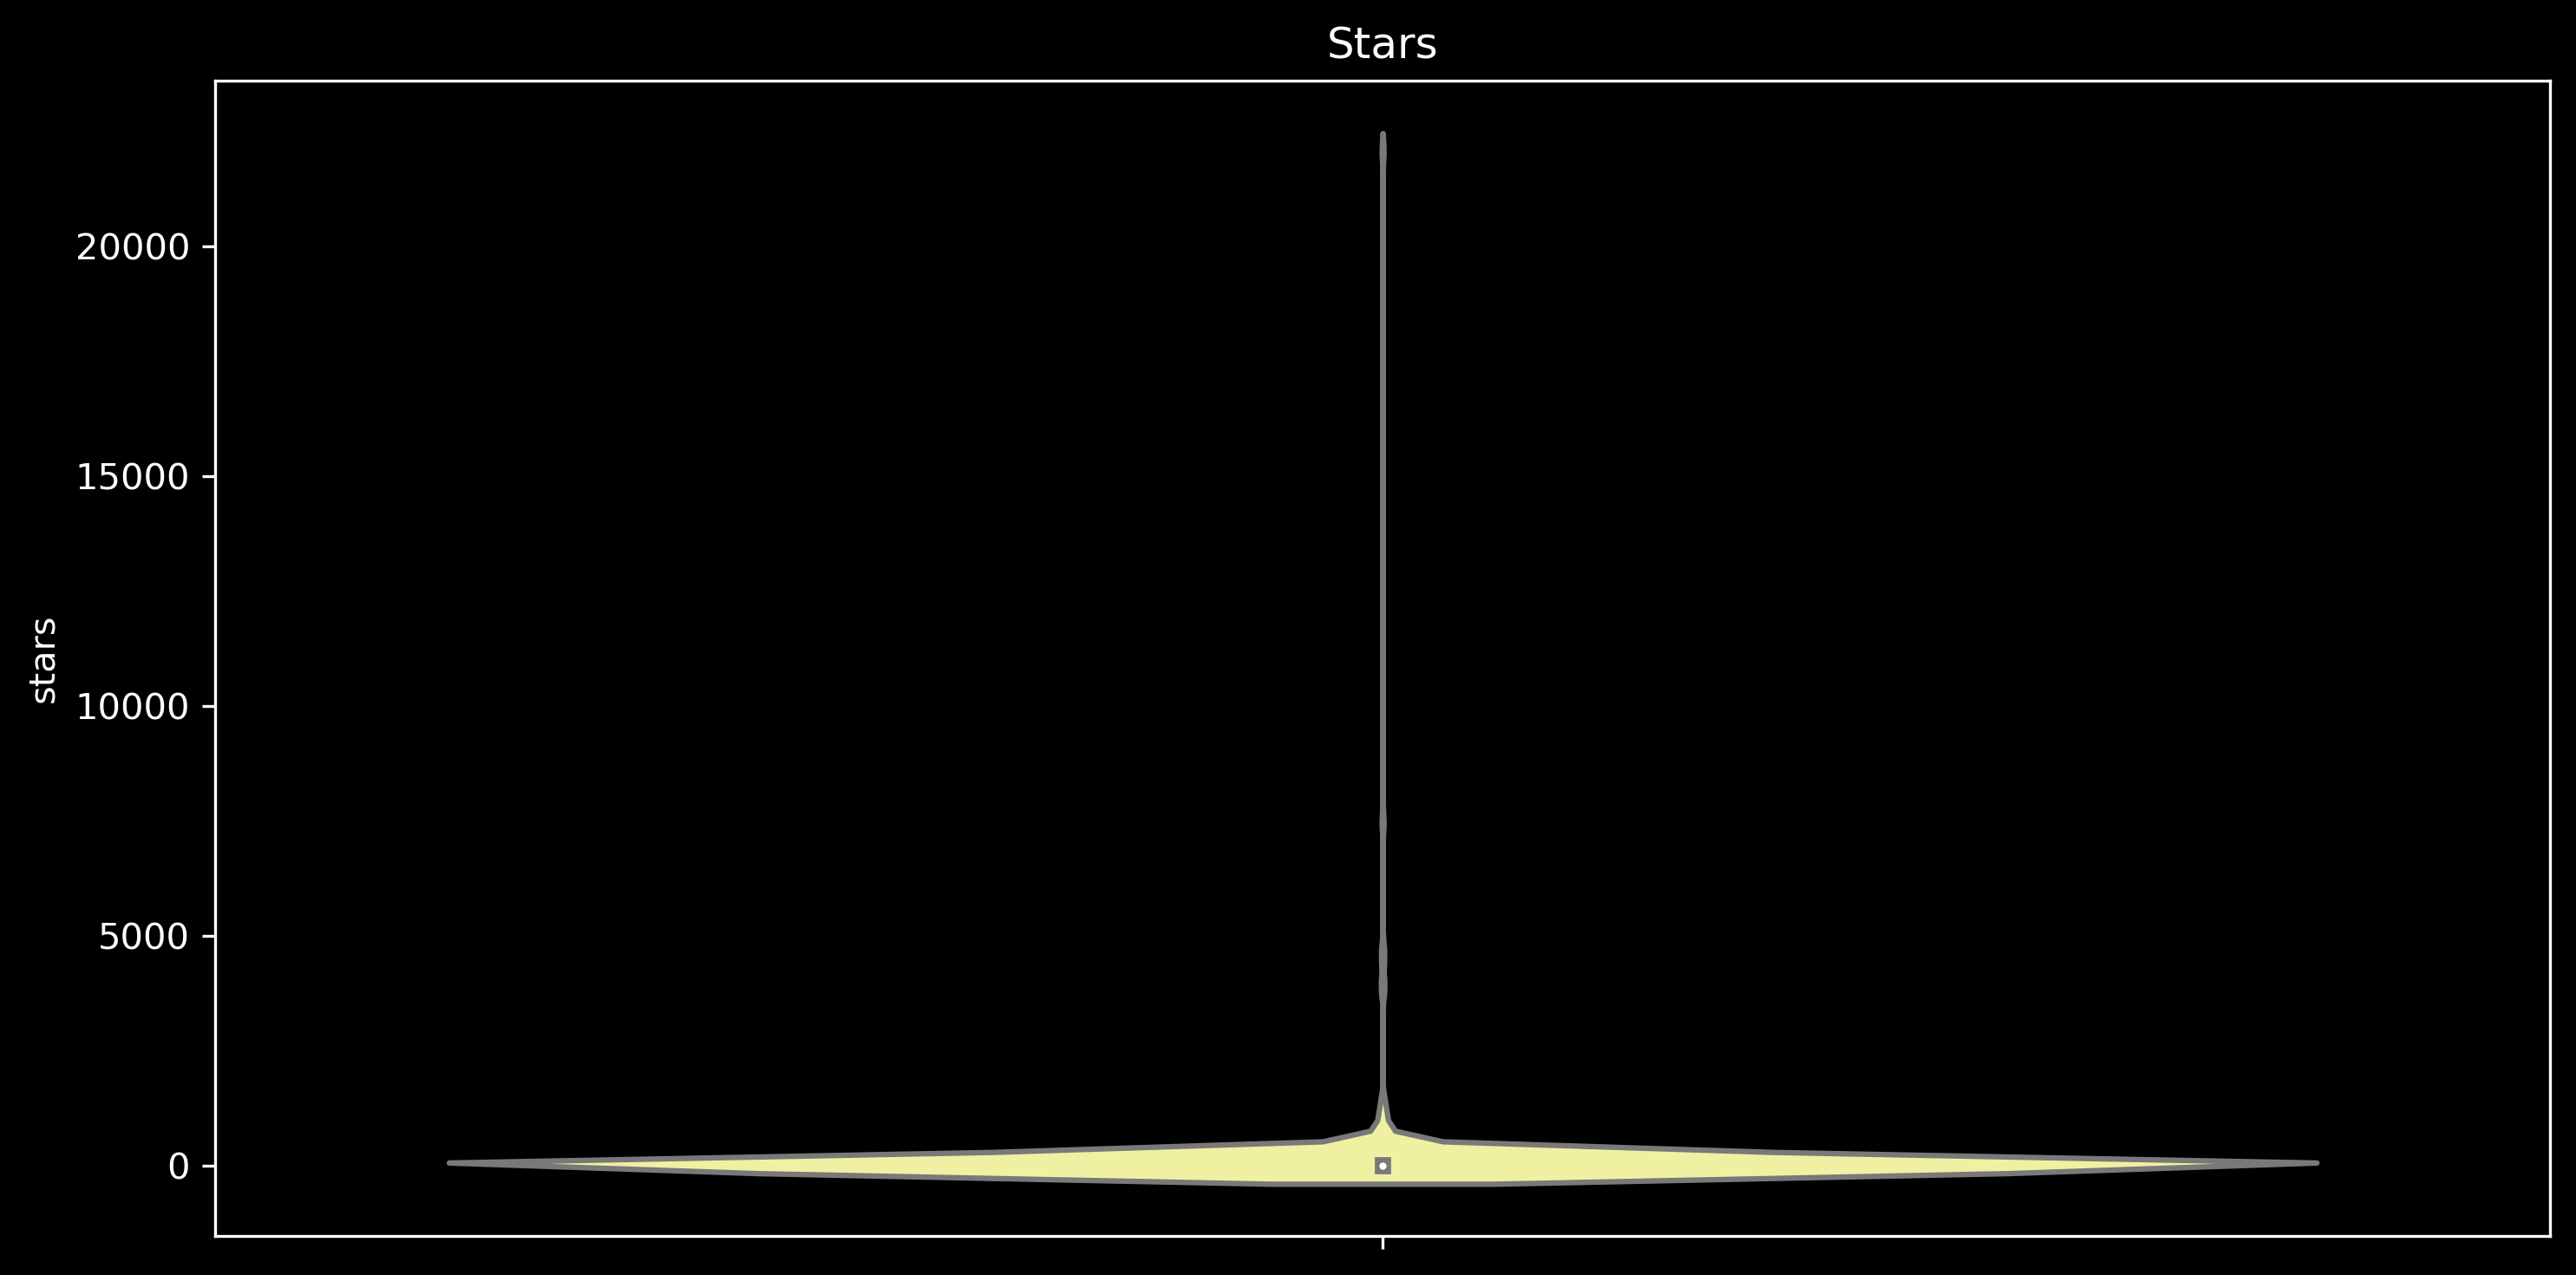

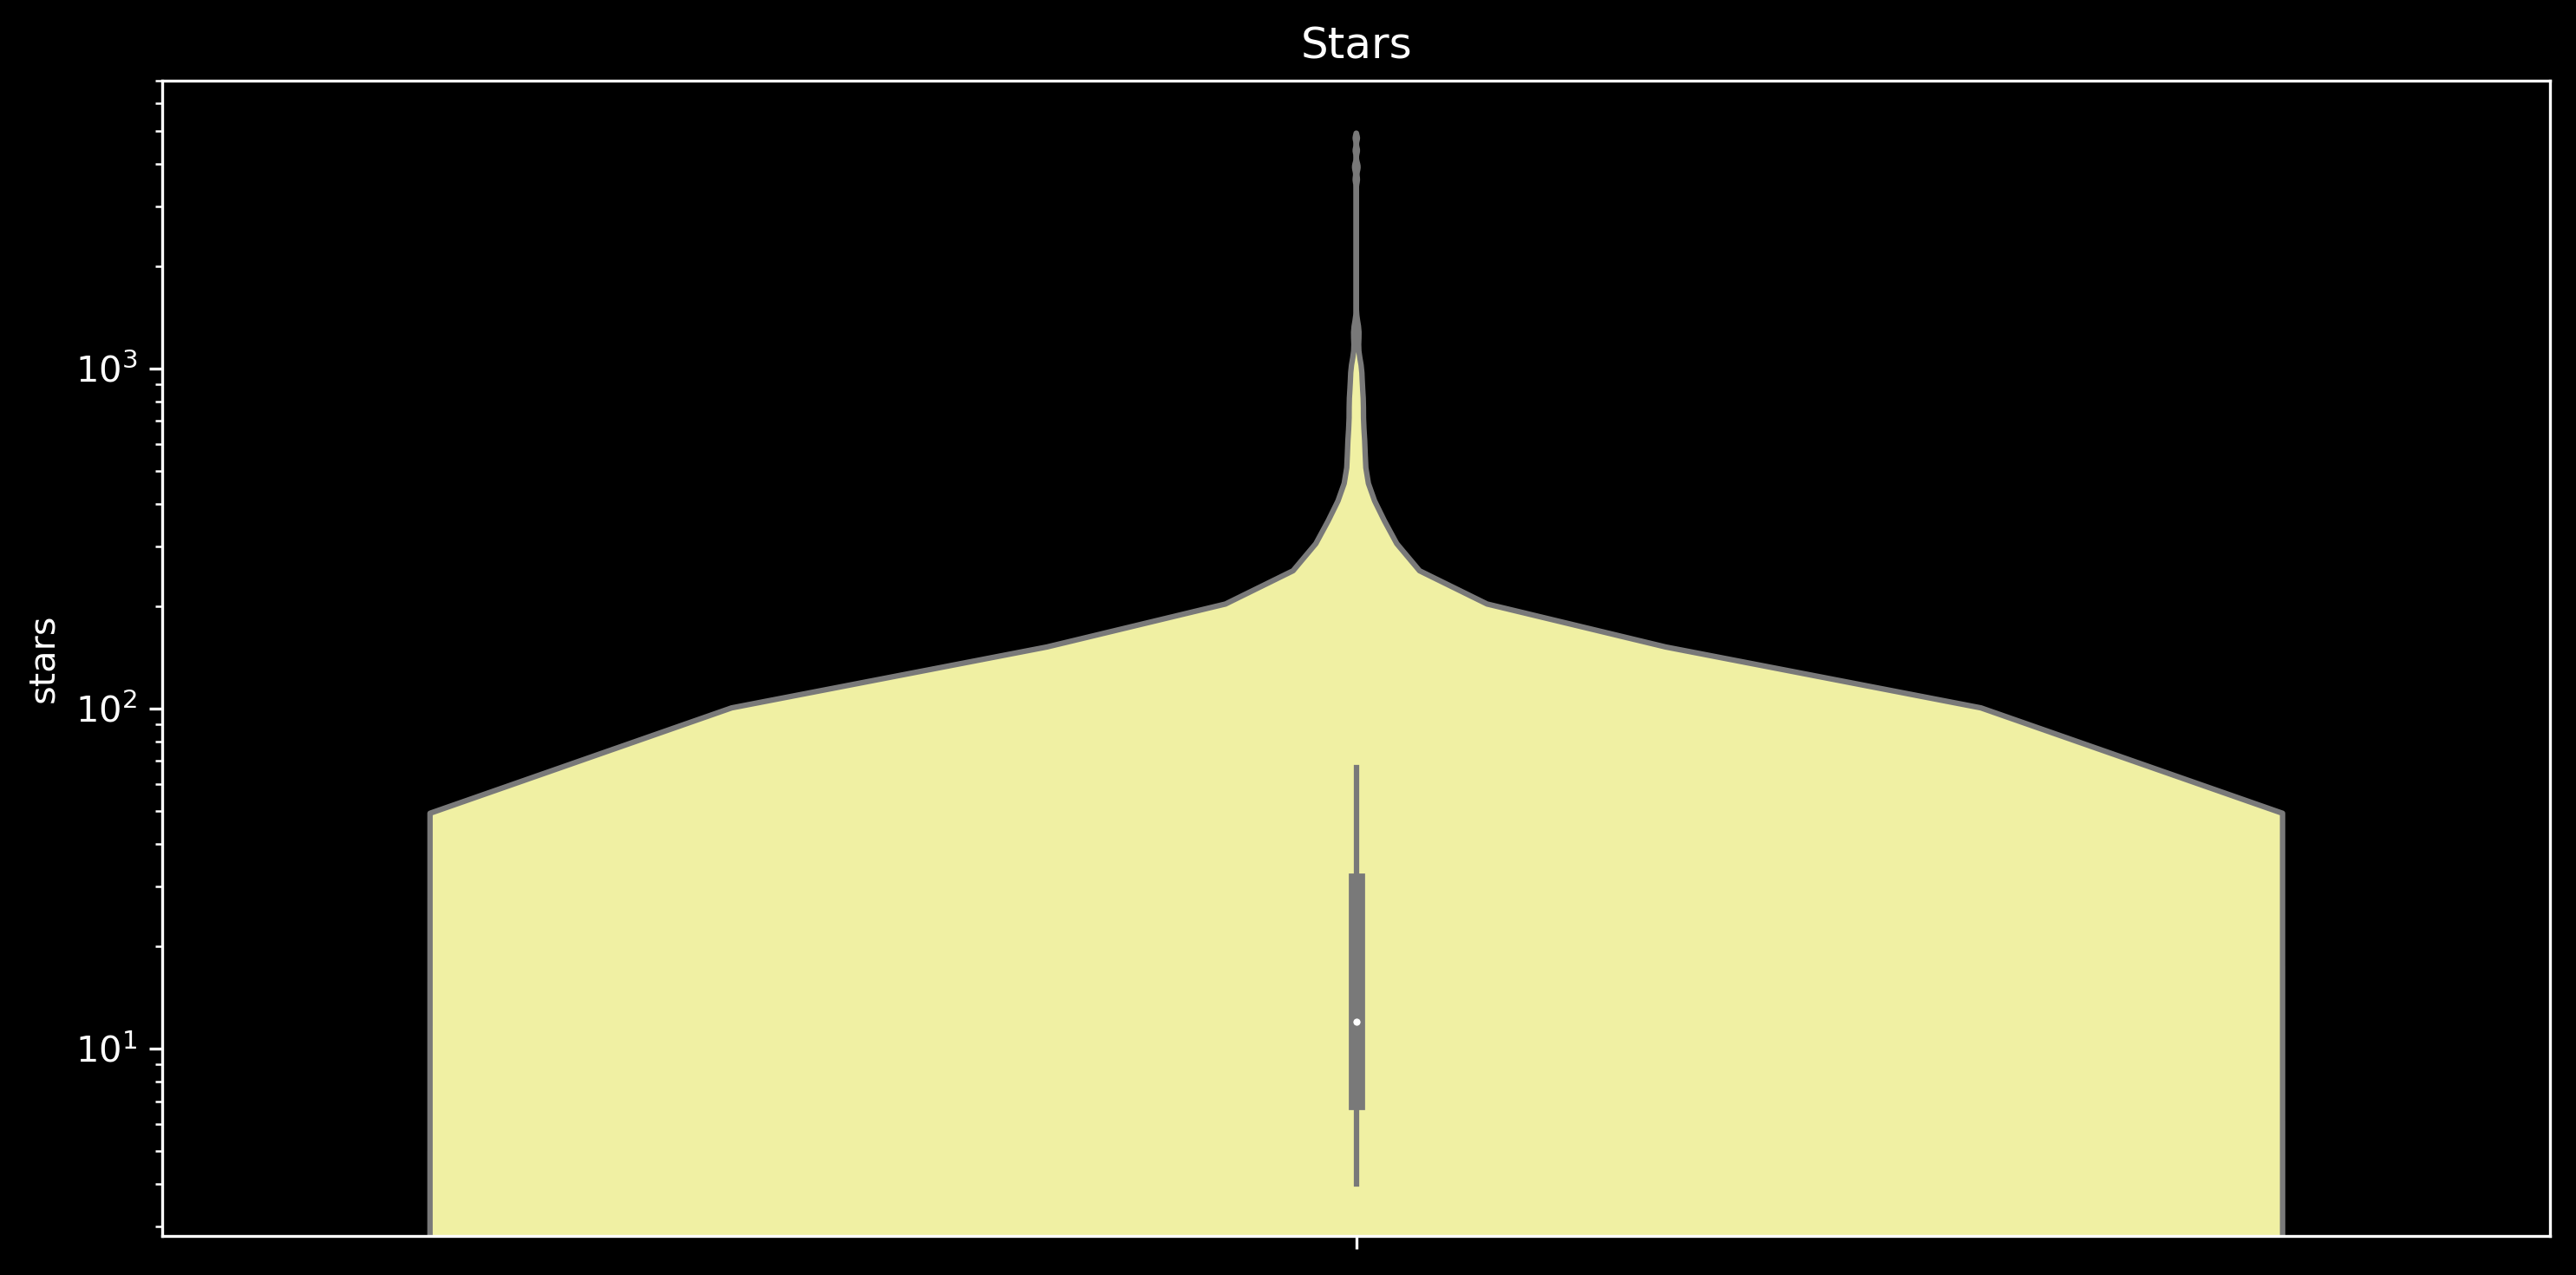

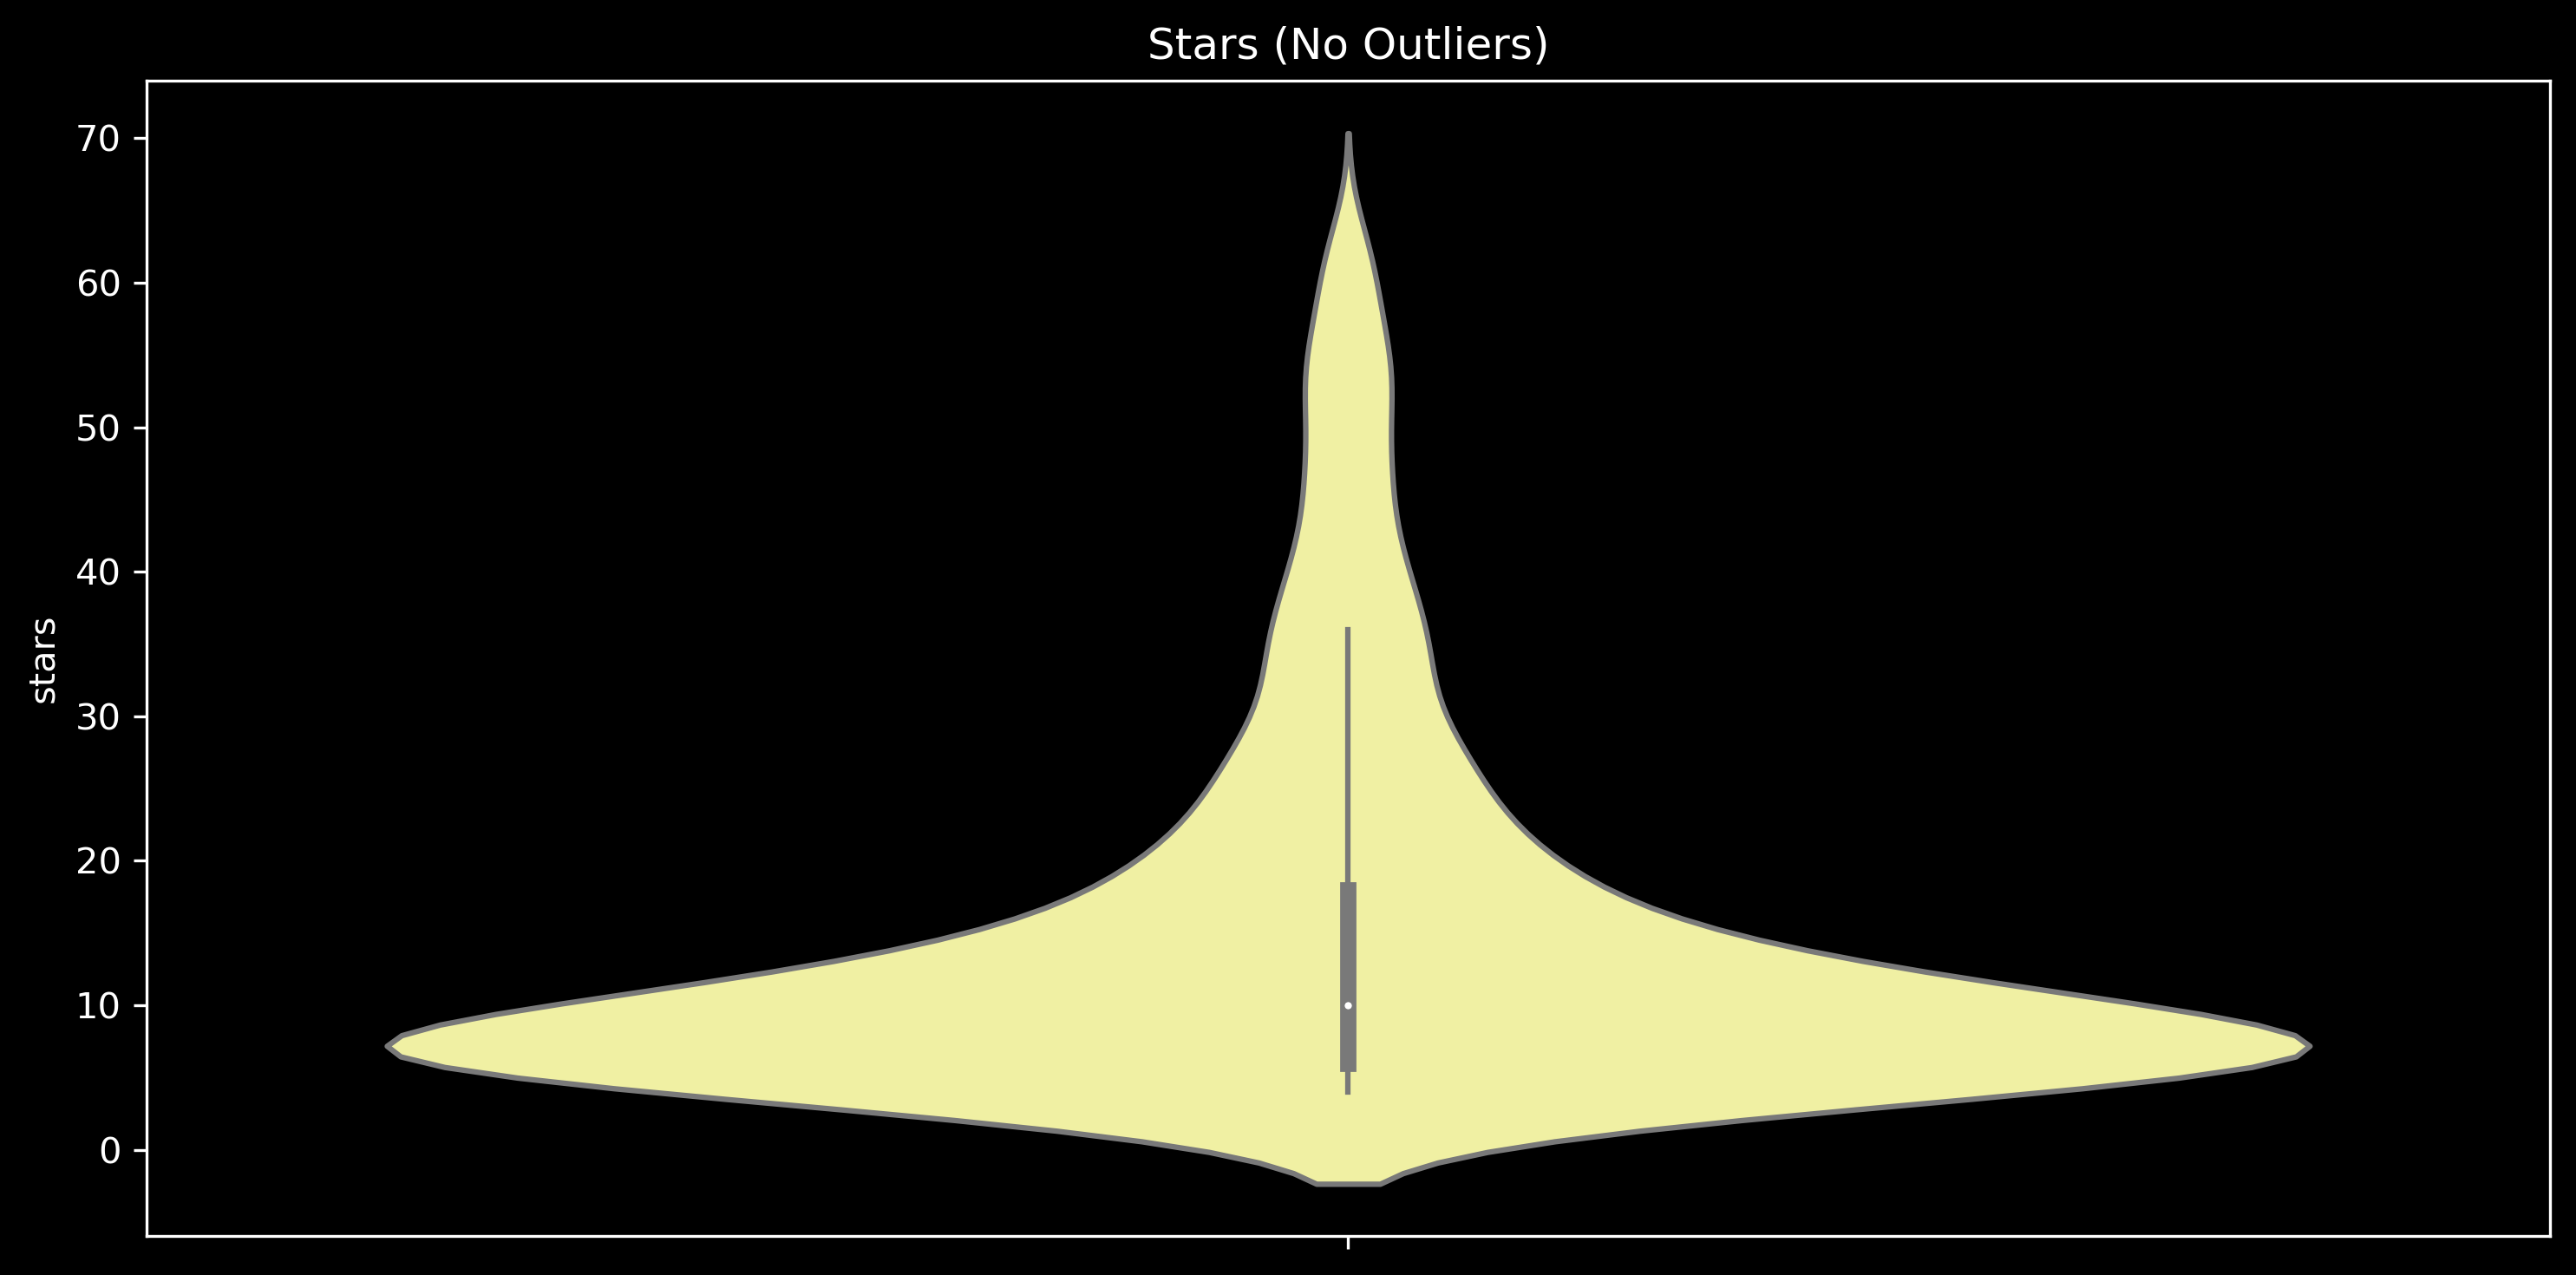

In [6]:
# TODO:Remove
def plot_violin_plots(x_data_cols, sample_size, in_log=False, titles=None):
  '''
    Plots violin plots for a sample of the given columns
  '''
  # Drop all except the given columns
  x_data_cols = x_data_cols.sample(sample_size)
  num_cols = x_data_cols.columns
  num_cols = len(num_cols)
  fig, axes = plt.subplots(1, num_cols, figsize=(10, 5))
  if num_cols == 1:
    sns.violinplot(y=x_data_cols[x_data_cols.columns[0]], ax=axes, color='#FDFD96')
    if titles is not None:
      axes.set_title(titles[0])
  else:
    for i, feat in enumerate(x_data_cols.columns):
          col = x_data_cols[feat]
          sns.violinplot(y=col, ax=axes[i % num_cols], color='#FDFD96')
          if titles is not None:
            axes[i % num_cols].set_title(titles[i % num_cols])
  if in_log:
    plt.yscale('log')
  plt.tight_layout()
  plt.show()

plot_violin_plots(x_data_d[['stars']],1000, titles=['Stars'])
plot_violin_plots(x_data_d[['stars']],1000, titles=['Stars'], in_log=True)
x_data_o = remove_outliers(x_data_d, 'stars')
plot_violin_plots(x_data_o[['stars']],1000, titles=['Stars (No Outliers)'])

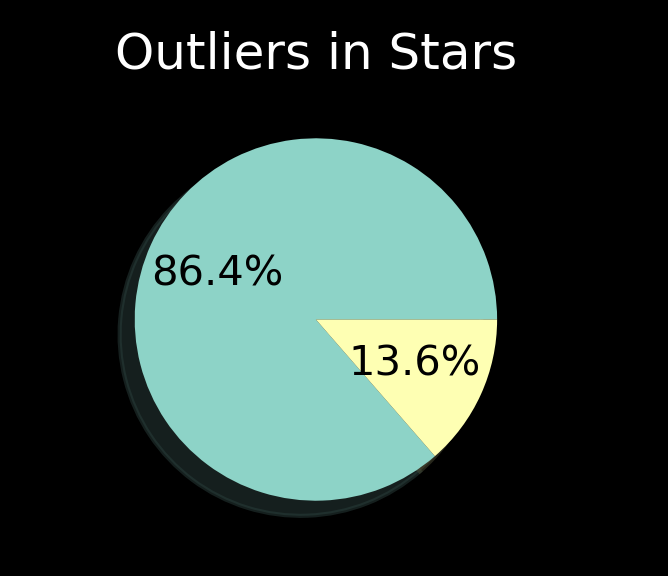

In [7]:
outliers_pie_plot(x_data_d)

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      There are extreme outliers in stars columns and most of the values are close to zero as github is filled with small projects from beginners.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      From the distribution of the data shown above (as viloin plots), we can see that distribution of the data is centered close zero and there are extreme outliers in stars column.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The data matches the expectations.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Model Building</h2> </font>
</span>

In [8]:
# remove amateur repositories (less than 20 stars)
stars_support = 20 #! Hyperparameter
x_data_serious = x_data_d[x_data_d['stars'] > stars_support]

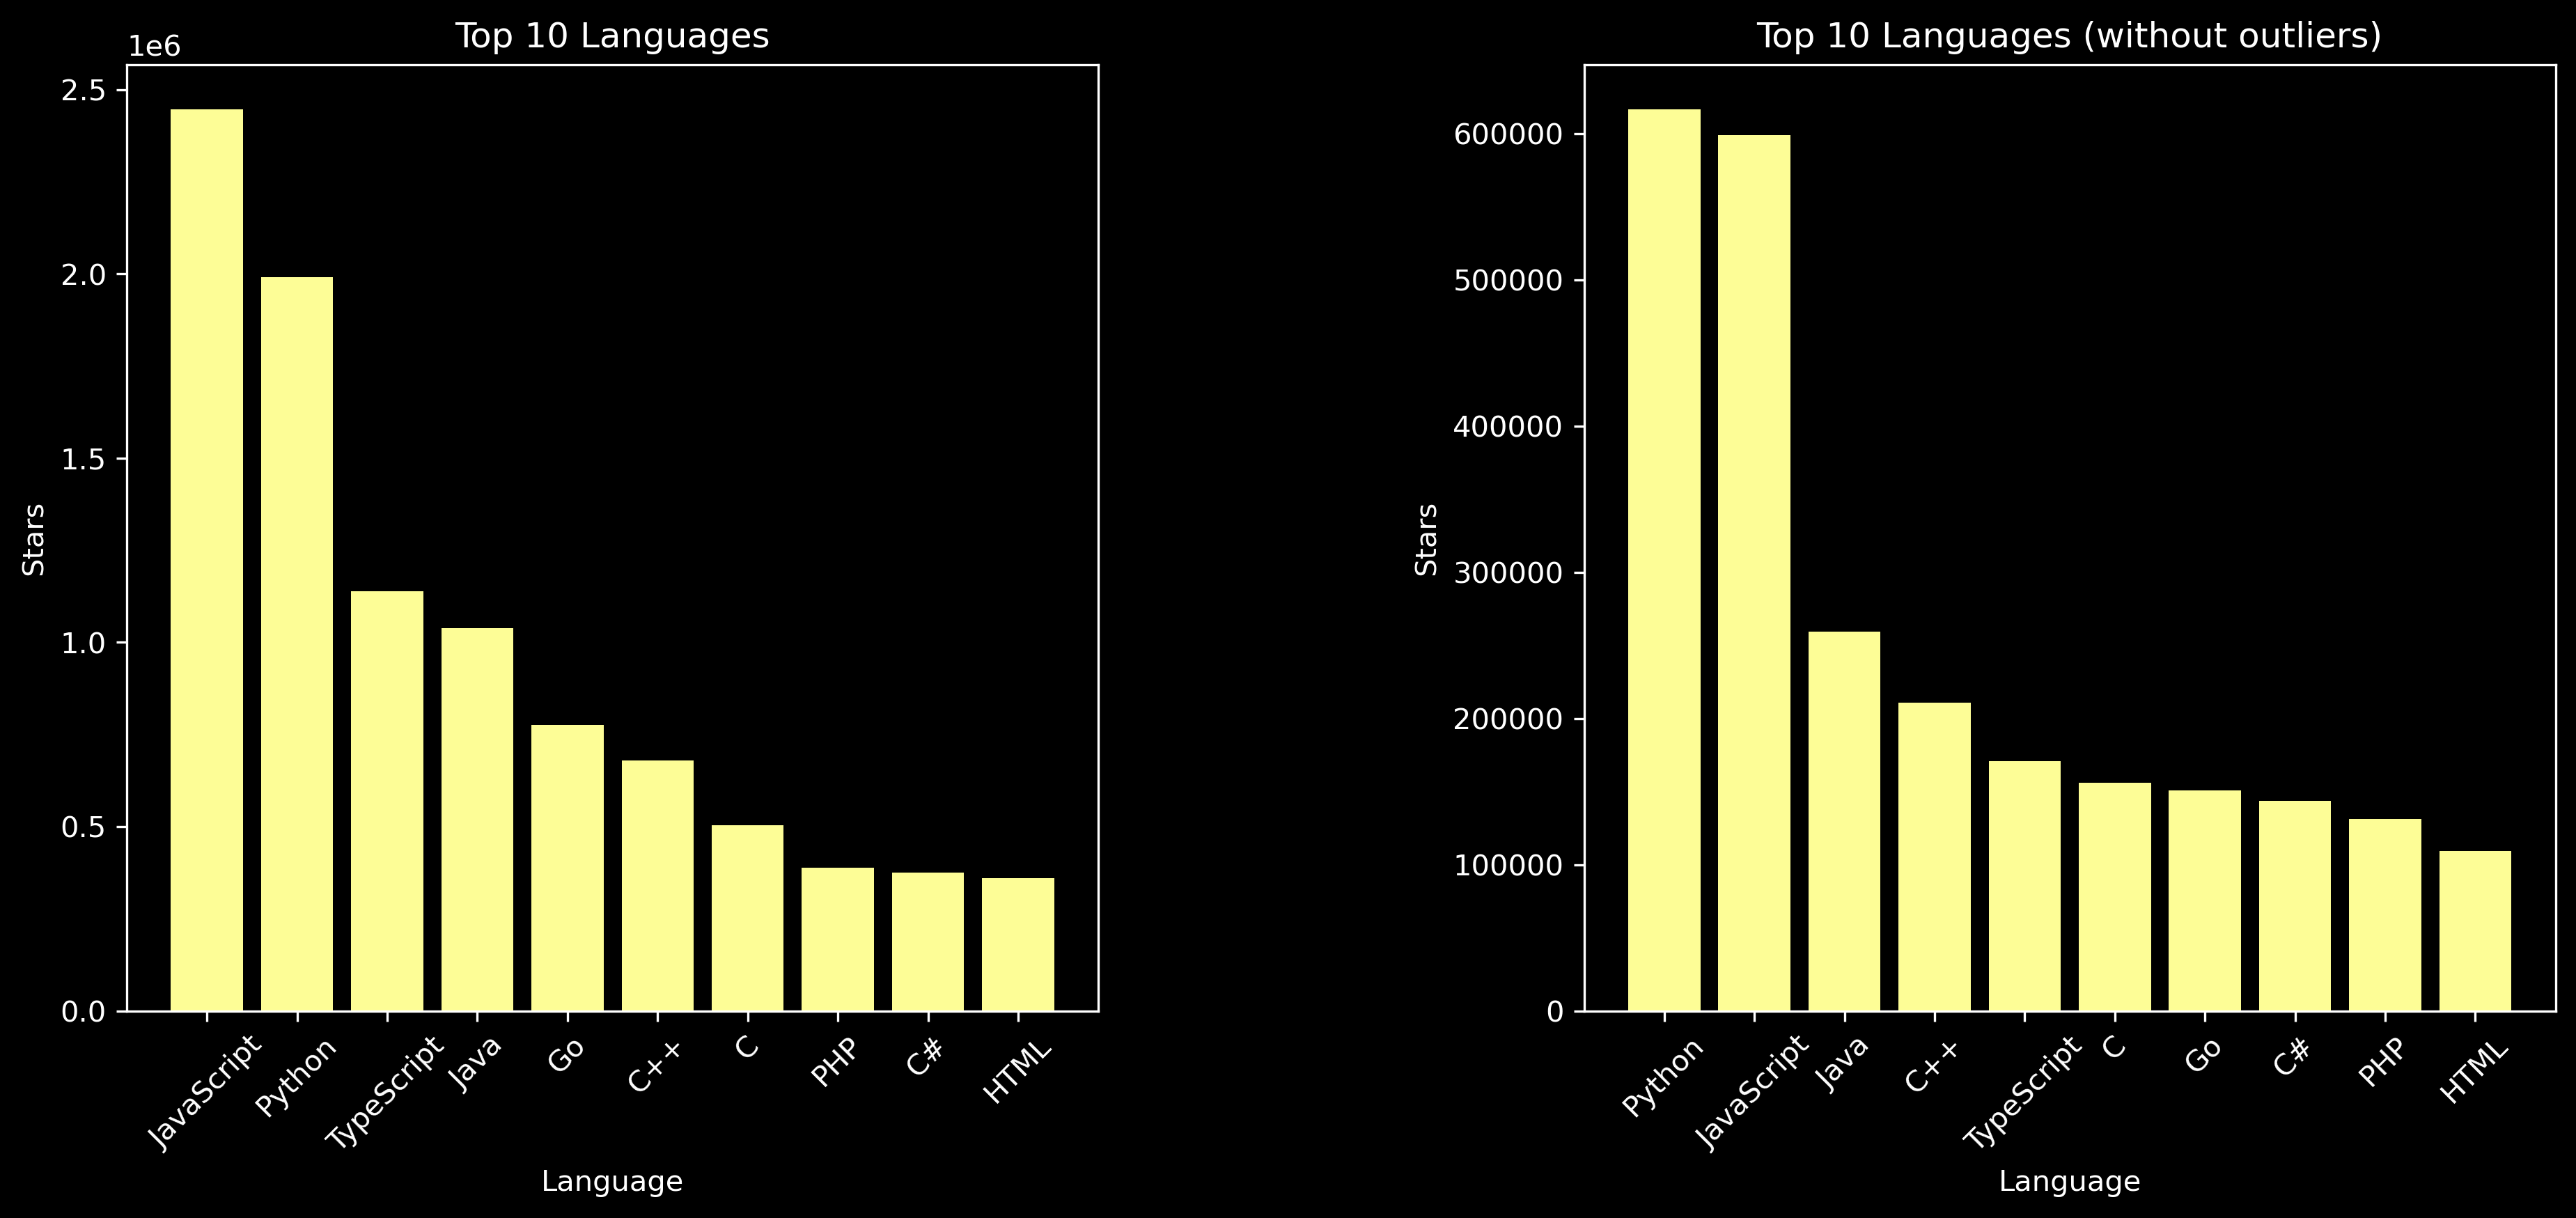

In [9]:
stars_per_languages(x_data_serious)

In [10]:
# # Trial 1 : Stars per year and month per language (Line plot)
# # TODO: Remove
# # remove amateur repositories (less than 20 stars)
# stars_support = 20  # Hyperparameter
# x_data_serious = x_data_d[x_data_d['stars'] > stars_support]

# # keep only repositories with top languages
# top_languages = x_data_serious.groupby('primaryLanguage')['stars'].sum().sort_values(ascending=False).head(5)
# x_data_serious = x_data_serious[x_data_serious['primaryLanguage'].isin(top_languages.index)]

# # extract year and month from createdAt column
# x_data_serious['year'] = x_data_serious['createdAt'].dt.year
# x_data_serious['month'] = x_data_serious['createdAt'].dt.month

# # group by year, month, and language
# x_data_serious = x_data_serious.groupby(['year', 'month', 'primaryLanguage'])['stars'].sum().reset_index()

# # Smooth the line using moving average
# window_size = 30  # Adjust the window size as needed
# x_data_serious['smoothed_stars'] = x_data_serious.groupby('primaryLanguage')['stars'].rolling(window_size, center=True).mean().reset_index(level=0, drop=True)

# # Convert back to line plot with increased line width
# plt.figure(figsize=(20, 10))
# sns.set_palette('husl', len(top_languages))
# for language in top_languages.index:
    
#     language_data = x_data_serious[x_data_serious['primaryLanguage'] == language]
#     plt.plot(language_data['year'] + language_data['month'] / 12, language_data['smoothed_stars'], linewidth=5)

# plt.legend(top_languages.index)
# plt.title('Stars per year and month per language (Line plot)')
# plt.show()


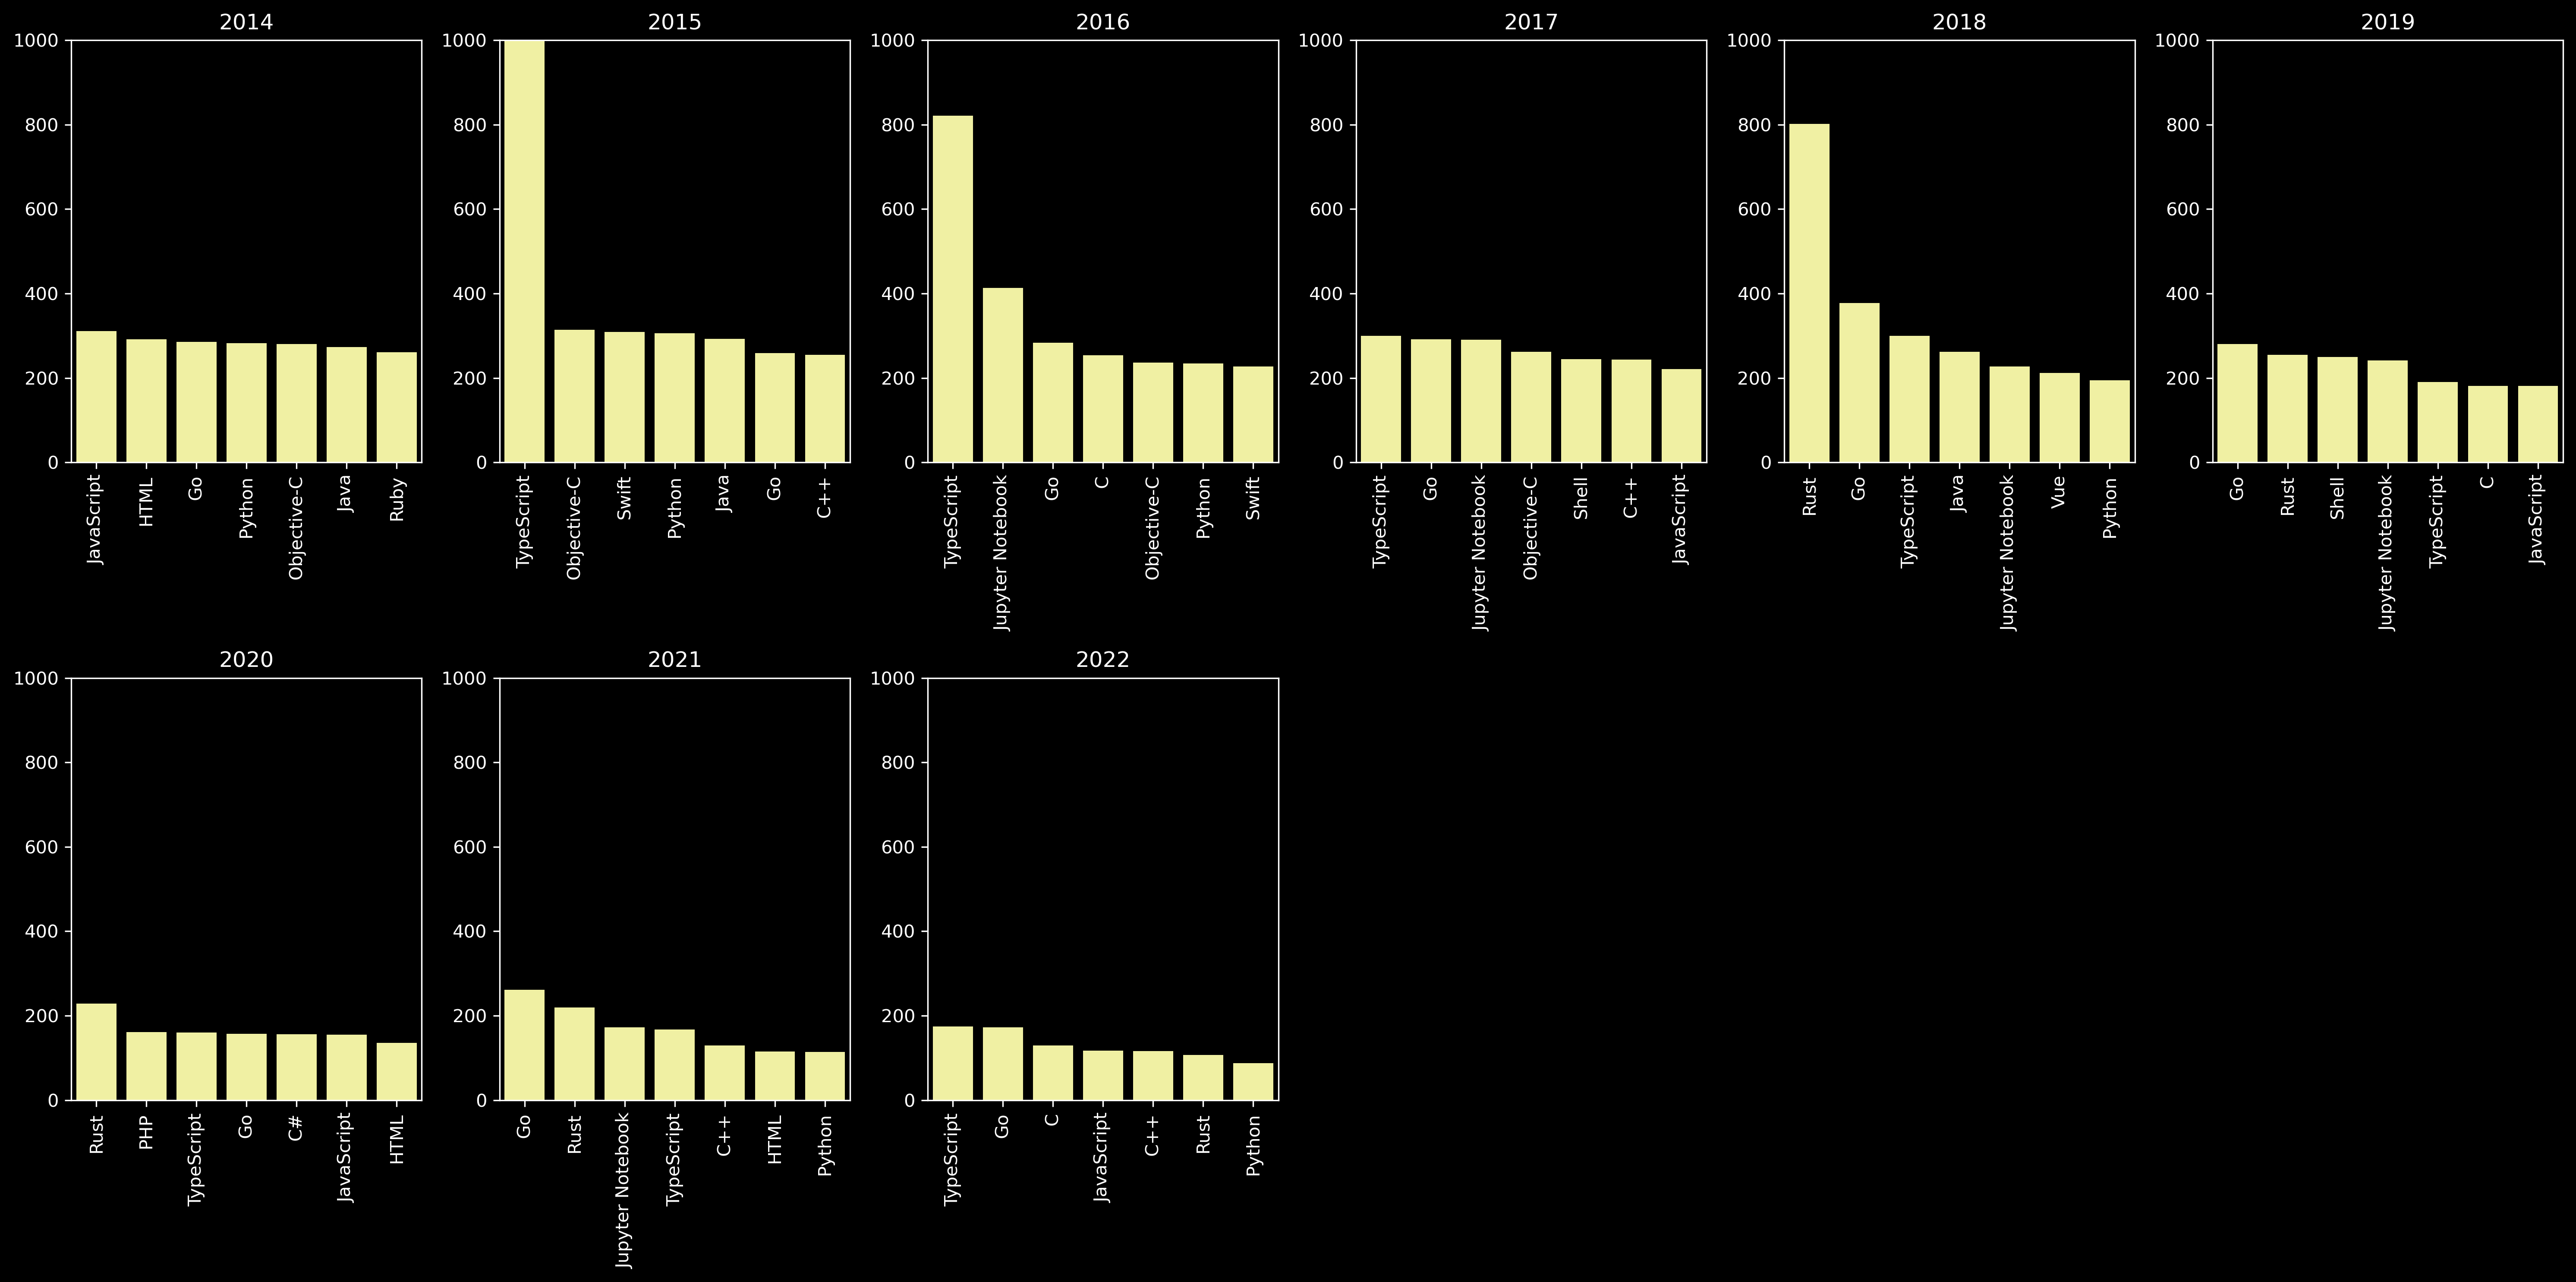

In [11]:
# # Trial 2 : Normalized stars (count of repos) per year per language
# add year column
x_data_serious['year'] = x_data_serious['createdAt'].dt.year
# Extract stars information per year per language
stars_anual = x_data_serious.groupby(['year', 'primaryLanguage'])['stars'].agg(['sum', 'count']).reset_index()
# Keep only languages with more than 1000 repositories
stars_anual= stars_anual[stars_anual['count']>100]
# Normalize stars
stars_anual['normalized_stars'] = stars_anual['sum'] / stars_anual['count']
# Order by year and normalized stars
# Plot Histogram for each year
num_years = len(stars_anual['year'].unique())
fig, axes = plt.subplots((2023-2014)//6+1, 6, figsize=(20, 10))

colors=['#FDFD96']*5

for i, year in enumerate(range(2014, 2023)):
    stars_anual_year = stars_anual[stars_anual['year'] == year].sort_values(by='normalized_stars', ascending=False).head(7)
    sns.barplot(x='primaryLanguage', y='normalized_stars', data=stars_anual_year, ax=axes[i//6, i%6], palette=colors)
    axes[i//6, i%6].set_title(year)
    axes[i//6, i%6].set_xlabel('')
    axes[i//6, i%6].set_ylabel('')
    axes[i//6, i%6].set_xticklabels(stars_anual_year['primaryLanguage'], rotation=90)
    axes[i//6, i%6].set_ylim(0, 1000)

#remove empty plots
fig.delaxes(axes[1, 3])
fig.delaxes(axes[1, 4])
fig.delaxes(axes[1, 5])

plt.tight_layout()
plt.show()

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The plot of total stars per language and the distribution of the stars over time will help to understand the relation between the number of stars and the programming language.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The plot of total stars per language and the distribution of the normalized stars over time are shown above.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The current model is good enough to explain the data.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Results & Interpretation</h2> </font>
</span>

In [14]:
convey_insights([
    "The most starred language is JavaScript followedS by Python but that doesn't take into account the number of repositories per language.",
    "TypeScript is the most appeared language in the 1st place regarding the normalized stars which reflects the success of the language.",
])


<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> The most starred language is JavaScript followed by Python but that doesn't take into account the number of repositories per language.<br><br><font color="pink">✦</font> TypeScript is the most appeared language in the 1st place regarding the normalized stars which reflects the success of the language.<br><br></font>

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The total number of stars per language and the distribution of the stars over time will help to understand the relation between the number of stars and the programming language is going to answer the question.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Shown in the insights section.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The question is answered.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Communicating Results</h2> </font>
</span>

In [13]:
### Probably code that will generate markdown

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Its as expected
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      This is my data
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Suppose data is expectations; done.
      </td>
    </tr>
  </tbody>
</table>

</span>

